# Analysis

## 1. Import Modules

In [1]:
%load_ext autoreload
%autoreload 2
# Author: Samay Panwar
# Date: March 2023
import os
import pandas as pd
import numpy as np
import seaborn as sns

path_parent = os.path.dirname(os.getcwd())

# if os.getcwd()[-8:] != 'HEALTH-ECONS':
#     os.chdir(path_parent)

print(os.getcwd())

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.rcParams.update({'axes.grid': True, 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})

/Users/samaypanwar/storage/University/Y4S2/HEALTH ECONS/group_project


## 2. Dataset Information

Import datasets

In [2]:
df_premiums = pd.read_csv('data/clean/main_data_file.csv')
df_premiums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97134 entries, 0 to 97133
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   State Code                                             97134 non-null  object 
 1   FIPS County Code                                       97134 non-null  int64  
 2   County Name                                            97134 non-null  object 
 3   Metal Level                                            97134 non-null  object 
 4   Issuer Name                                            97134 non-null  object 
 5   Premium Adult Individual Age 21                        97134 non-null  float64
 6   Medical Deductible - Individual - Standard             97134 non-null  float64
 7   Medical Maximum Out Of Pocket - Individual - Standard  97134 non-null  float64
 8   Time Trend                                     

In [3]:
df_covid = pd.read_csv('data/clean/year_and_statewise_covid_cases.csv')
df_covid = df_covid.rename(columns = {
        'state': 'State Code',
        'date_updated': 'Time Trend',
        'new_cases': 'Cases'
        })

df_covid['Time Trend'] = list(map(lambda x: x.year, pd.to_datetime(df_covid['Time Trend'])))
print(df_covid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State Code  180 non-null    object
 1   Time Trend  180 non-null    int64 
 2   Cases       180 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.3+ KB
None


In [4]:
df_political = pd.read_csv('data/clean/cleaned_political_data.csv')
df_political.head()

,State Code,Time Trend,Unity
0,AL,2017,Rep
1,AK,2017,Divided
2,AZ,2017,Rep
3,AR,2017,Rep
4,CA,2017,Dem


## 3. Plots for Numeric Data

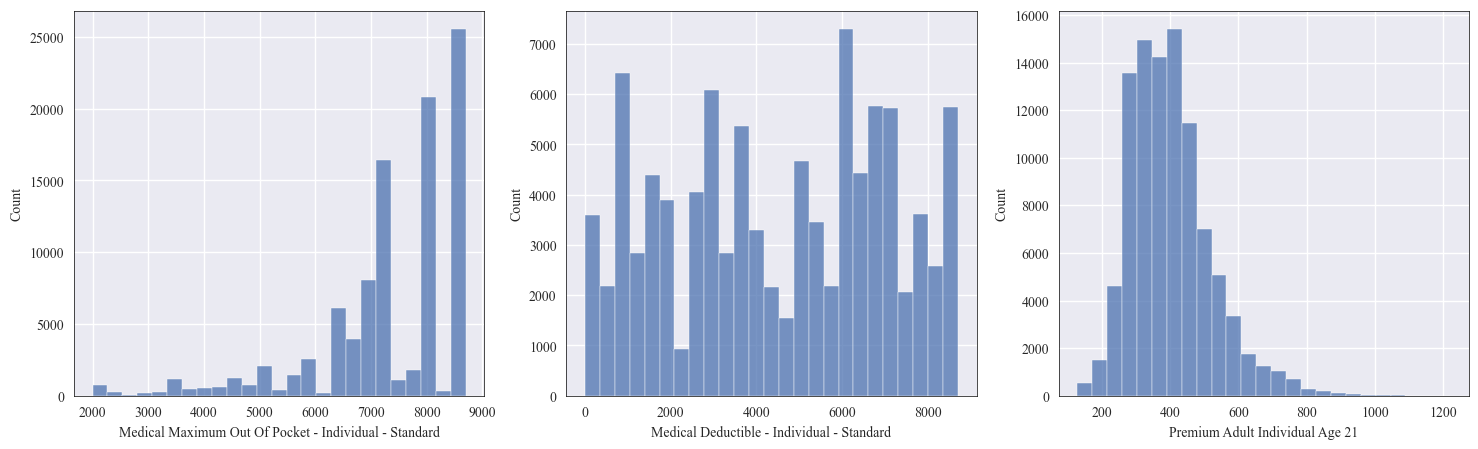

In [5]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
sns.histplot(df_premiums['Medical Maximum Out Of Pocket - Individual - Standard'], bins = 25, ax=ax[0]);
sns.histplot(df_premiums['Medical Deductible - Individual - Standard'], bins = 25, ax=ax[1]);
sns.histplot(df_premiums['Premium Adult Individual Age 21'], bins = 25, ax=ax[2]);

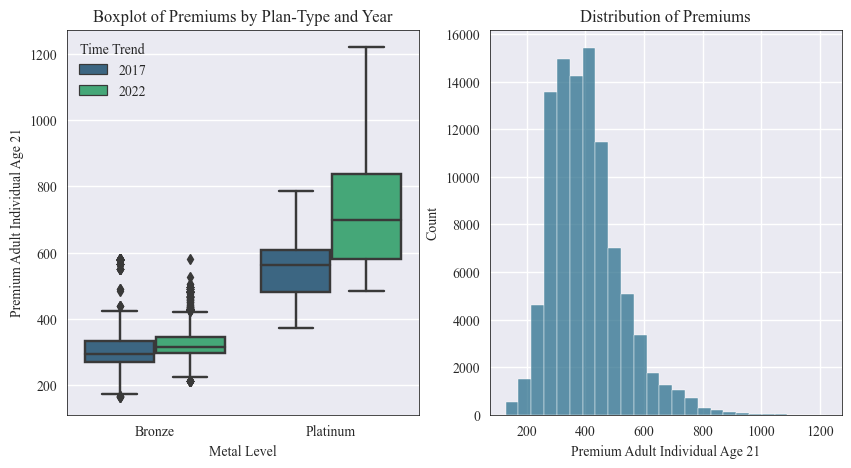

In [6]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
sns.boxplot(data = df_premiums[df_premiums['Metal Level'].isin(['Platinum', 'Bronze']) & df_premiums['Time Trend'].isin([2017, 2022])], y = 'Premium Adult Individual Age 21', x = 'Metal Level', ax=ax[0], hue = 'Time Trend', palette = 'viridis')
sns.histplot(df_premiums['Premium Adult Individual Age 21'], bins = 25, ax=ax[1], color = '#2d718e');
ax[0].set_title('Boxplot of Premiums by Plan-Type and Year')
ax[1].set_title('Distribution of Premiums')
plt.savefig('figures/Distribution of Premiums Boxplots.png', dpi=300, format='png')


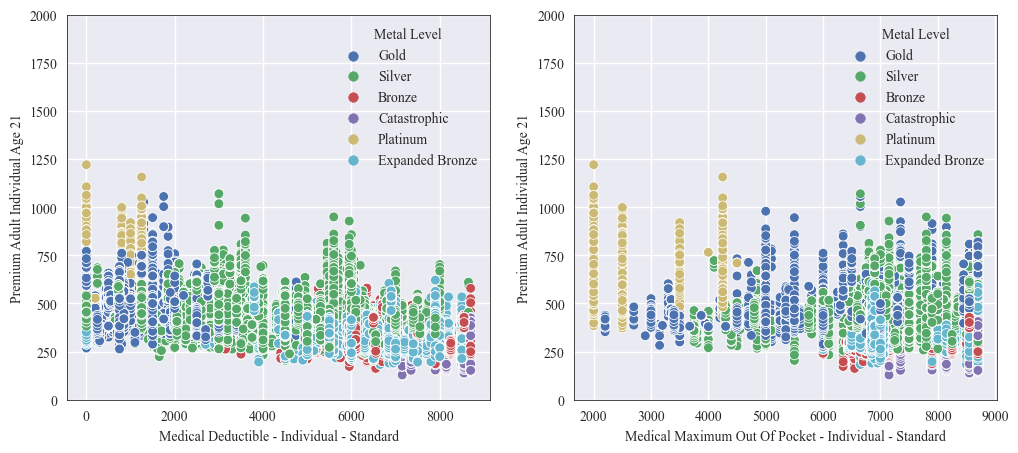

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.scatterplot(data = df_premiums, x = df_premiums['Medical Deductible - Individual - Standard'], y = df_premiums['Premium Adult Individual Age 21'], ax=ax[0], hue = df_premiums['Metal Level']);
sns.scatterplot(data = df_premiums, x = df_premiums['Medical Maximum Out Of Pocket - Individual - Standard'], y = df_premiums['Premium Adult Individual Age 21'], ax=ax[1], hue = df_premiums['Metal Level']);
ax[0].set_ylim(0, 2000);
ax[1].set_ylim(0, 2000);

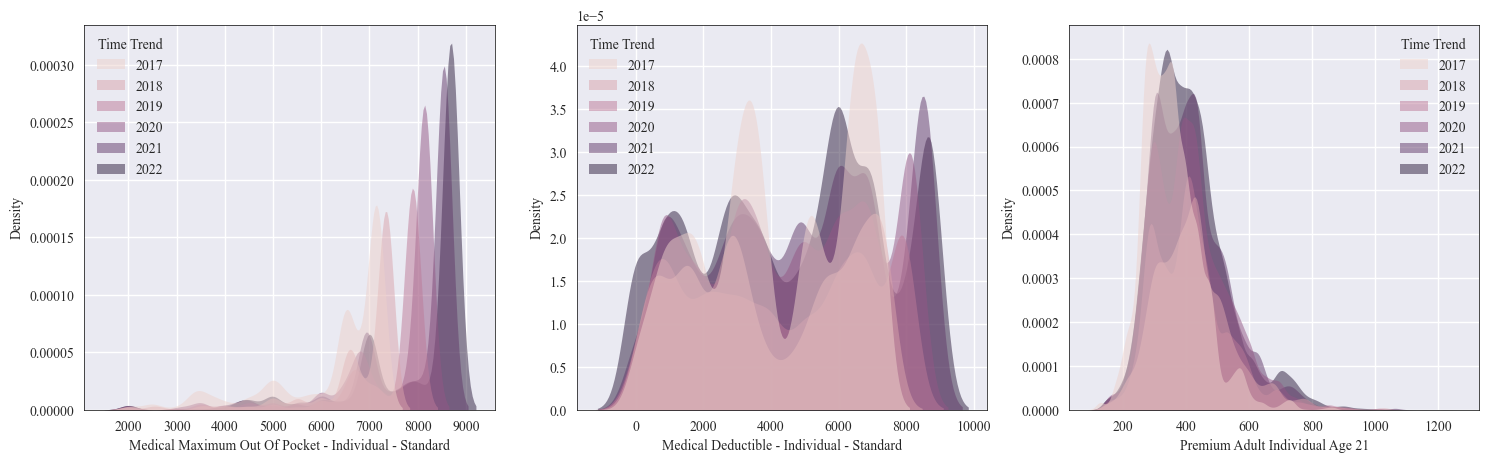

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
plot1 = sns.kdeplot(data = df_premiums, x = 'Medical Maximum Out Of Pocket - Individual - Standard', hue = 'Time Trend', ax=ax[0], fill=True,
   alpha=.5, linewidth=0);
plot2 = sns.kdeplot(data = df_premiums, x = 'Medical Deductible - Individual - Standard', hue = 'Time Trend', ax=ax[1], fill=True,
   alpha=.5, linewidth=0);
plot3 = sns.kdeplot(data = df_premiums, x = 'Premium Adult Individual Age 21', hue = 'Time Trend', ax=ax[2], fill=True,
   alpha=.5, linewidth=0);

sns.move_legend(plot1, "upper left")
sns.move_legend(plot2, "upper left")
sns.move_legend(plot3, "upper right")

<Axes: xlabel='Time Trend', ylabel='Premium Adult Individual Age 21'>

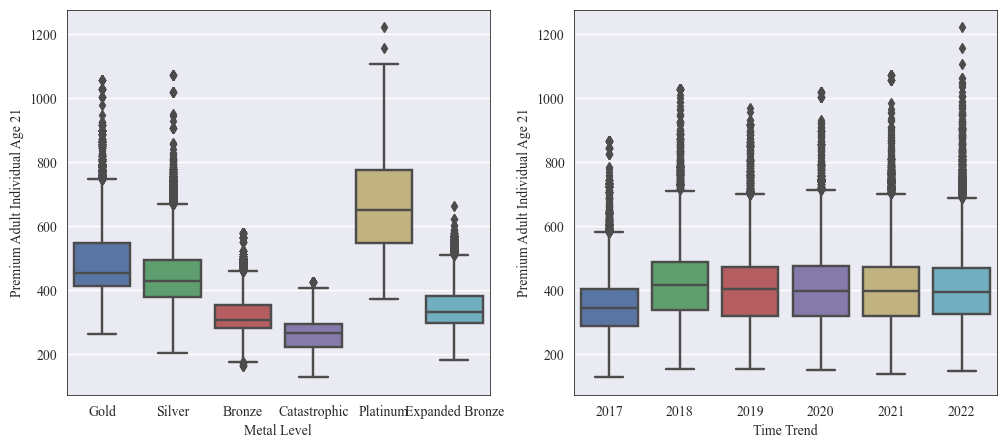

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.boxplot(y = df_premiums['Premium Adult Individual Age 21'], x = df_premiums['Metal Level'], ax=ax[0])
sns.boxplot(y = df_premiums['Premium Adult Individual Age 21'], x = df_premiums['Time Trend'], ax=ax[1])

<Axes: xlabel='Time Trend', ylabel='Premium Adult Individual Age 21'>

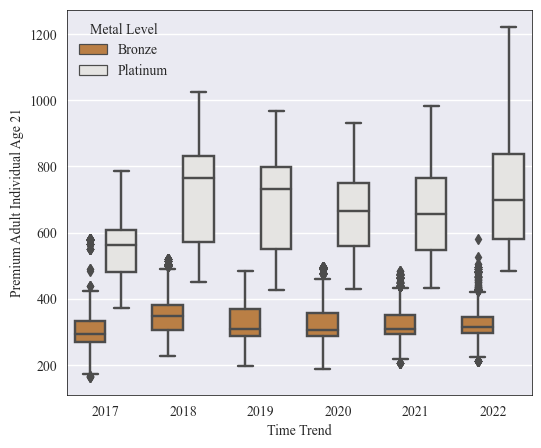

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))
sns.boxplot(data = df_premiums[df_premiums['Metal Level'].isin(['Platinum', 'Bronze'])], y = 'Premium Adult Individual Age 21', x = 'Time Trend', ax=ax, hue = 'Metal Level', palette = ['#CD7F32', '#e5e4e2'])

<Axes: xlabel='Metal Level', ylabel='Premium Adult Individual Age 21'>

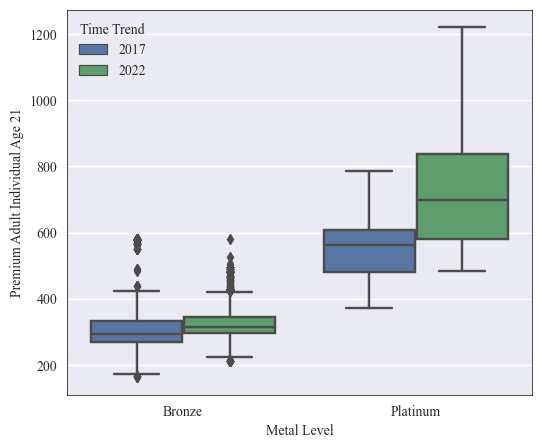

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))
sns.boxplot(data = df_premiums[df_premiums['Metal Level'].isin(['Platinum', 'Bronze']) & df_premiums['Time Trend'].isin([2017, 2022])], y = 'Premium Adult Individual Age 21', x = 'Metal Level', ax=ax, hue = 'Time Trend')

<Axes: xlabel='Time Trend', ylabel='Premium Adult Individual Age 21'>

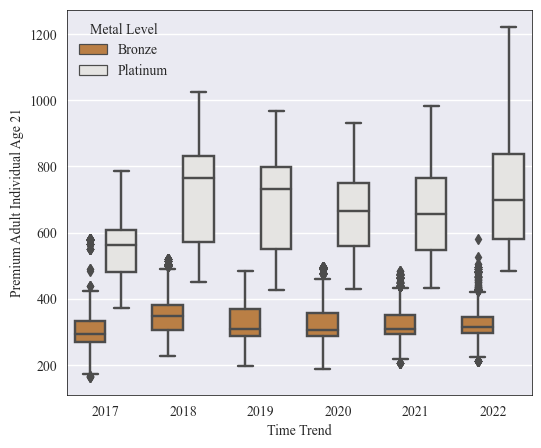

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))
sns.boxplot(data = df_premiums[df_premiums['Metal Level'].isin(['Platinum', 'Bronze'])], y = 'Premium Adult Individual Age 21', x = 'Time Trend', ax=ax, hue = 'Metal Level', palette = ['#CD7F32', '#e5e4e2'])

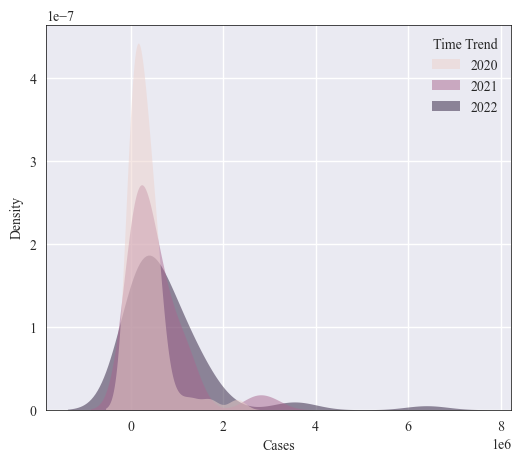

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))

sns.kdeplot(x = df_covid['Cases'], fill=True,
   alpha=.5, linewidth=0, hue = df_covid['Time Trend']);

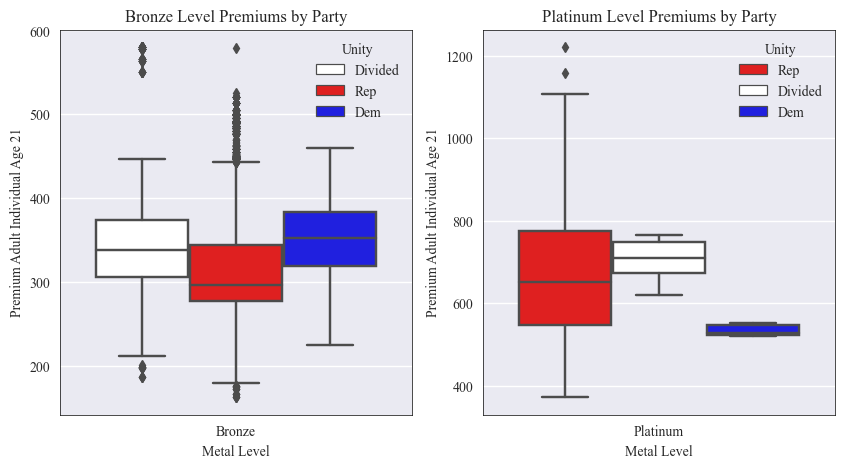

In [14]:
df_regression = pd.merge(df_premiums, df_covid,  how='left', left_on=['State Code','Time Trend'], right_on = ['State Code', 'Time Trend'])

df_regression = pd.merge(df_regression, df_political,  how='left', left_on=['State Code','Time Trend'], right_on = ['State Code', 'Time Trend'])

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
sns.boxplot(data = df_regression[df_regression['Metal Level'].isin(['Bronze'])], y = 'Premium Adult Individual Age 21', x = 'Metal Level', ax=ax[0], hue = 'Unity', palette = ['white', 'red', 'blue'])

sns.boxplot(data = df_regression[df_regression['Metal Level'].isin(['Platinum'])], y = 'Premium Adult Individual Age 21', x = 'Metal Level', ax=ax[1], hue = 'Unity', palette = ['red', 'white', 'blue'])

ax[0].set_title('Bronze Level Premiums by Party')
ax[1].set_title('Platinum Level Premiums by Party')

plt.savefig('figures/Dist of Premium by Party.png', dpi = 300, format = 'png')

<Axes: xlabel='State Code'>

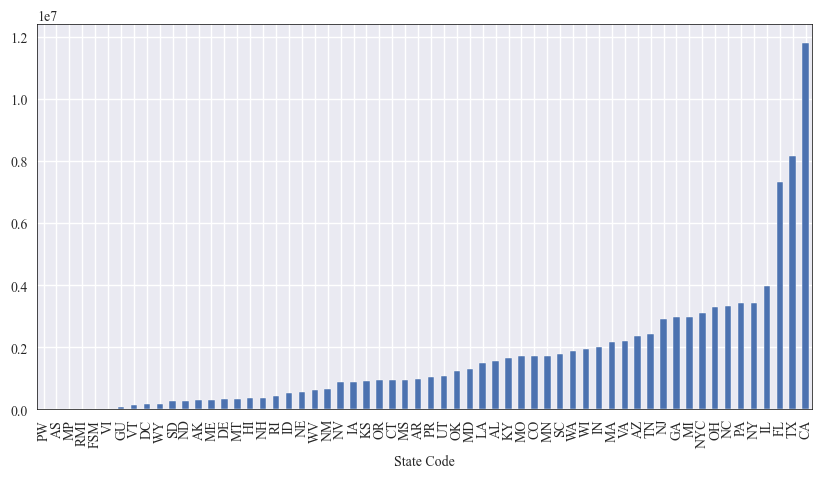

In [15]:
df_covid.groupby('State Code')['Cases'].sum().sort_values().plot(kind = 'bar', figsize = (10, 5))

## 4. KS Normality Test

In [16]:
from scipy.stats import kstest
import scipy
def multivariate_ks(series):

    statistic = []
    pvalue = []

    for col in series.columns:
        result = kstest(rvs = series[col], cdf = scipy.stats.norm.cdf)
        statistic.append(result.statistic)
        pvalue.append(result.pvalue)

    return pd.DataFrame(data = {'statistic': statistic, 'pvalue': pvalue}, index = series.columns)


In [17]:
numeric_variables = [
        'Premium Adult Individual Age 21',
        'Medical Deductible - Individual - Standard',
        'Medical Maximum Out Of Pocket - Individual - Standard',
        ]
print(multivariate_ks(df_premiums[numeric_variables]))

                                                    statistic  pvalue
Premium Adult Individual Age 21                      1.000000     0.0
Medical Deductible - Individual - Standard           0.968384     0.0
Medical Maximum Out Of Pocket - Individual - St...   1.000000     0.0


## 5. Create Dummies

In [18]:
import statsmodels.api as sm

state_dummies = pd.get_dummies(df_premiums['State Code'])
plan_type = pd.get_dummies(df_premiums['Metal Level'])


df_regression = pd.merge(df_premiums, df_covid,  how='left', left_on=['State Code','Time Trend'], right_on = ['State Code', 'Time Trend'])

df_regression = pd.merge(df_regression, df_political,  how='left', left_on=['State Code','Time Trend'], right_on = ['State Code', 'Time Trend'])
df_regression.Cases = df_regression.Cases.fillna(0) / 1_000
# df_regression.info()

cols_to_drop = [
        'State Code',
        'FIPS County Code',
        'County Name',
        'Metal Level',
        'Issuer Name',
        'Time Trend',
        'Unity'
        ]

year_dummy = pd.get_dummies(df_regression['Time Trend'])
political_dummies = pd.get_dummies(df_regression['Unity'])
df_regression.drop(cols_to_drop, axis=1, inplace = True)
df_regression = pd.concat([df_regression, state_dummies, plan_type, year_dummy, political_dummies], axis=1)

dummies_to_drop = [
        'Catastrophic', # Base Metal Plan
        'NH', # Base State
        2017, # Base Year
        "Divided" # Base Political State
        ]

df_regression.drop(dummies_to_drop, axis=1, inplace = True)

df_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97134 entries, 0 to 97133
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Premium Adult Individual Age 21                        97134 non-null  float64
 1   Medical Deductible - Individual - Standard             97134 non-null  float64
 2   Medical Maximum Out Of Pocket - Individual - Standard  97134 non-null  float64
 3   Cases                                                  97134 non-null  float64
 4   AK                                                     97134 non-null  uint8  
 5   AL                                                     97134 non-null  uint8  
 6   AR                                                     97134 non-null  uint8  
 7   AZ                                                     97134 non-null  uint8  
 8   DE                                            

In [19]:
df_regression[df_regression.columns.difference(year_dummy.columns.tolist() + state_dummies.columns.tolist() + plan_type.columns.tolist())].describe().T

,count,mean,std,min,25%,50%,75%,max
Cases,97134.0,687.410114,973.554505,0.00,0.0000,295.813,1137.278,3658.918
Dem,97134.0,0.060339,0.238116,0.00,0.0000,0.000,0.000,1.000
Medical Deductible - Individual - Standard,97134.0,4469.816542,2556.249702,0.00,2450.0000,4700.000,6650.000,8700.000
Medical Maximum Out Of Pocket - Individual - Standard,97134.0,7347.693135,1330.362792,2000.00,6850.0000,7500.000,8550.000,8700.000
Premium Adult Individual Age 21,97134.0,402.099856,118.608566,128.66,314.4425,388.350,461.130,1220.640
Rep,97134.0,0.730517,0.443694,0.00,0.0000,1.000,1.000,1.000


## 6. Regression Analysis

In [20]:
import logging

#now we will Create and configure logger
logging.basicConfig(filename="log.log",
					format='%(message)s',
					filemode='w')

#Let us Create an object
logger=logging.getLogger()

#Now we are going to Set the threshold of logger to DEBUG
logger.setLevel(logging.DEBUG)


In [21]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 21'
independent_variables = df_regression.columns.difference([dependent_variable] + year_dummy.columns.tolist() + state_dummies.columns.tolist() + plan_type.columns.tolist())
Y = df_regression[dependent_variable]
Y = df_regression[dependent_variable]
X = sm.add_constant(df_regression[independent_variables])

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
!echo "" > log.log
logger.warning("BASE MODEL")
logger.debug("----------------------------------------------------------------")
logger.info(res.summary())
logger.info("\n \n")

In [22]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 21'
independent_variables = df_regression.columns.difference([dependent_variable] + year_dummy.columns.tolist() + state_dummies.columns.tolist())
Y = df_regression[dependent_variable]
X = sm.add_constant(df_regression[independent_variables])

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
logger.warning("BASE MODEL | PLAN FIXED EFFECTS")
logger.debug("----------------------------------------------------------------")
logger.info(res.summary())
logger.info("\n \n")

In [23]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 21'
independent_variables = df_regression.columns.difference([dependent_variable] + year_dummy.columns.tolist())
Y = df_regression[dependent_variable]
X = sm.add_constant(df_regression[independent_variables])

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
logger.warning("BASE MODEL | PLAN FIXED EFFECTS + STATE FIXED EFFECTS")
logger.debug("----------------------------------------------------------------")
logger.info(res.summary())
logger.info("\n \n")

In [24]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 21'
independent_variables = df_regression.columns.difference([dependent_variable])
Y = df_regression[dependent_variable]
X = sm.add_constant(df_regression[independent_variables])

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
logger.warning("BASE MODEL | PLAN FIXED EFFECTS + STATE FIXED EFFECTS + YEAR FIXED EFFECTS")
logger.debug("----------------------------------------------------------------")
logger.info(res.summary())
logger.info("\n \n")

In [25]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 21'
independent_variables = df_regression.columns.difference([dependent_variable])
Y = df_regression[dependent_variable]
X = sm.add_constant(df_regression[independent_variables])
X = pd.concat([X, plan_type.multiply(df_regression.Cases, axis='index').add_suffix("*Cases")], axis=1)
X = X[X.columns.difference(['Catastrophic*Cases'])]
mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
logger.warning("BASE MODEL | PLAN FIXED EFFECTS + STATE FIXED EFFECTS + YEAR FIXED EFFECTS + INTERACTION TERMS")
logger.debug("----------------------------------------------------------------")
logger.info(res.summary())
logger.info("\n \n")


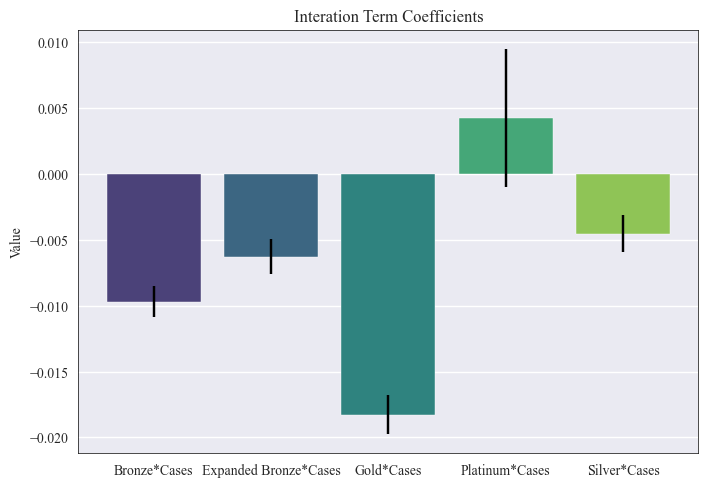

In [26]:
data = pd.concat([res.conf_int().filter(like = "*Cases", axis=0).rename(columns = {0: 'Lower', 1: 'Upper'}), res.params.filter(like = "*Cases", axis=0).rename('Value')], axis=1)

sns.barplot(x=data.index, y=data['Value'], palette = 'viridis')
plt.errorbar(x=data.index, y=data['Value'], yerr=(data['Value'] - data['Lower'], data['Upper'] - data['Value']), fmt='none', color='black', capsize = 1)
plt.title('Interation Term Coefficients')
plt.savefig('figures/Interation Term Coefficients.png', dpi = 300, format = 'png')
plt.show()